<a href="https://colab.research.google.com/github/ABIARASYDRAJATPRAKOSO/PCVK_TI_GANJIL_2023/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

In [ ]:
image = cv.imread('/content/drive/MyDrive/Images PCVK/lena.jpg')
blue_channel, green_channel, red_channel = cv.split(image)

In [ ]:
blue_hist = cv.calcHist([blue_channel], [0], None, [256], [0, 256])
green_hist = cv.calcHist([green_channel], [0], None, [256], [0, 256])
red_hist = cv.calcHist([red_channel], [0], None, [256], [0, 256])


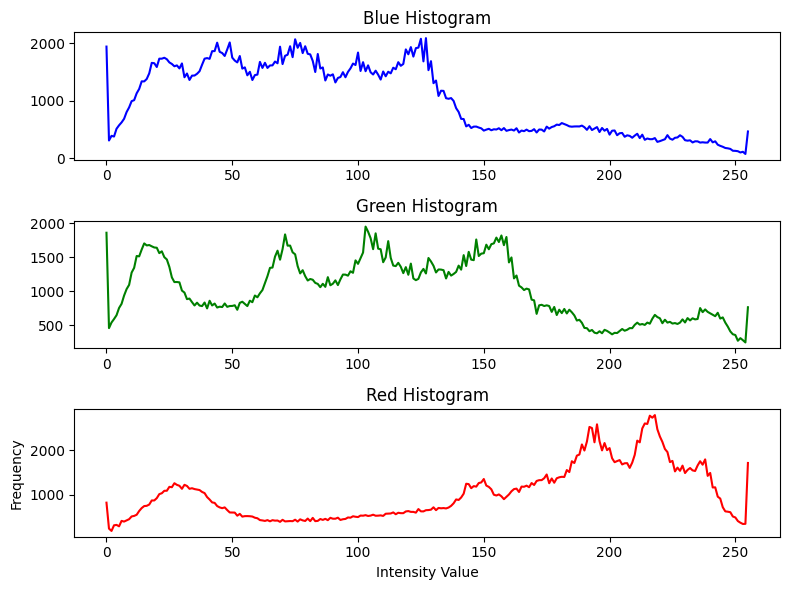

In [ ]:
plt.figure(figsize=(8, 6))
plt.subplot(313)
plt.plot(red_hist, color='red')
plt.title('Red Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.subplot(312)
plt.plot(green_hist, color='green')
plt.title('Green Histogram')

plt.subplot(311)
plt.plot(blue_hist, color='blue')
plt.title('Blue Histogram')

plt.tight_layout()
plt.show()

After working on question no. 3, make the same image histogram but use the library
that is owned by NumPy, namely " histogram ". Compare the results. Does the
output appear the same?


<ipython-input-48-10fa8ef7caa8>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 4)


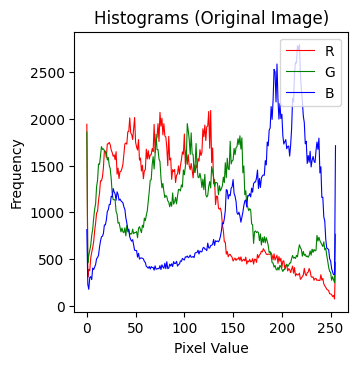

In [48]:
# Load your image here
image = cv.imread('/content/drive/MyDrive/Images PCVK/lena.jpg')

r_channel, g_channel, b_channel = cv.split(image)

# Calculate histograms for the original
hist_original_r = np.histogram(r_channel, bins=256, range=(0, 256))[0]
hist_original_g = np.histogram(g_channel, bins=256, range=(0, 256))[0]
hist_original_b = np.histogram(b_channel, bins=256, range=(0, 256))[0]
histogram, bin_edges = np.histogram(image.ravel(), bins=256, range=(0, 256))

plt.figure(figsize=(12, 8))

# Plot the histogram
plt.title('Image Histogram Using NumPy')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.plot(histogram, color='black')
plt.xlim([0, 256])

# Histograms for R, G, and B channels of the original image
plt.subplot(2, 3, 4)
plt.plot(hist_original_r, color='red', label='R', linewidth=0.8)
plt.plot(hist_original_g, color='green', label='G', linewidth=0.8)
plt.plot(hist_original_b, color='blue', label='B', linewidth=0.8)
plt.title('Histograms (Original Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

Make an image histogram such as the output equalization histogram and also the
image display before and after the following equalization histogram process based on
the flowchart below : (Use image lena_lc .jpg)



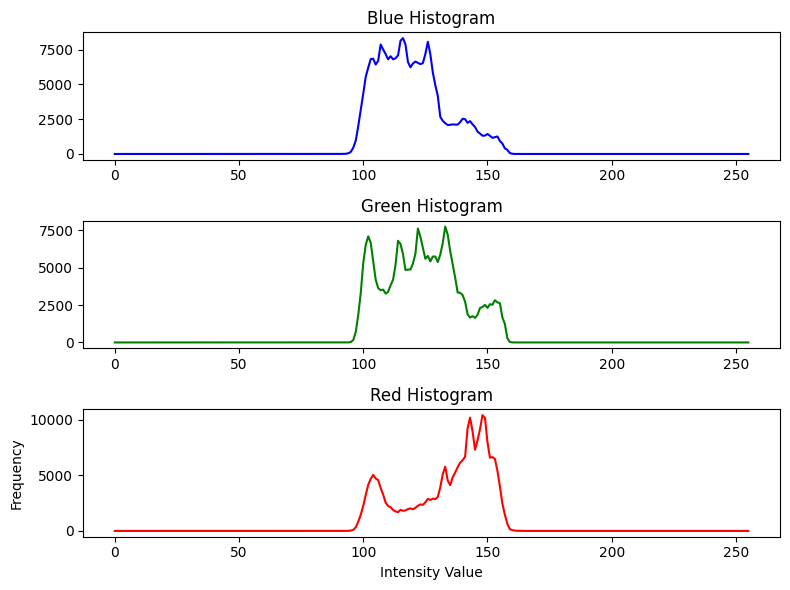

In [7]:
image = cv.imread('/content/drive/MyDrive/Images PCVK/lena_lc.jpg')
blue_channel, green_channel, red_channel = cv.split(image)

blue_hist = cv.calcHist([blue_channel], [0], None, [256], [0, 256])
green_hist = cv.calcHist([green_channel], [0], None, [256], [0, 256])
red_hist = cv.calcHist([red_channel], [0], None, [256], [0, 256])

plt.figure(figsize=(8, 6))
plt.subplot(313)
plt.plot(red_hist, color='red')
plt.title('Red Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.subplot(312)
plt.plot(green_hist, color='green')
plt.title('Green Histogram')

plt.subplot(311)
plt.plot(blue_hist, color='blue')
plt.title('Blue Histogram')

plt.tight_layout()
plt.show()


After working on question no. 5, make the same image histogram but use the library
owned by CV2, namely " equalizeHist ". Compare the results. Does the output
appear the same?

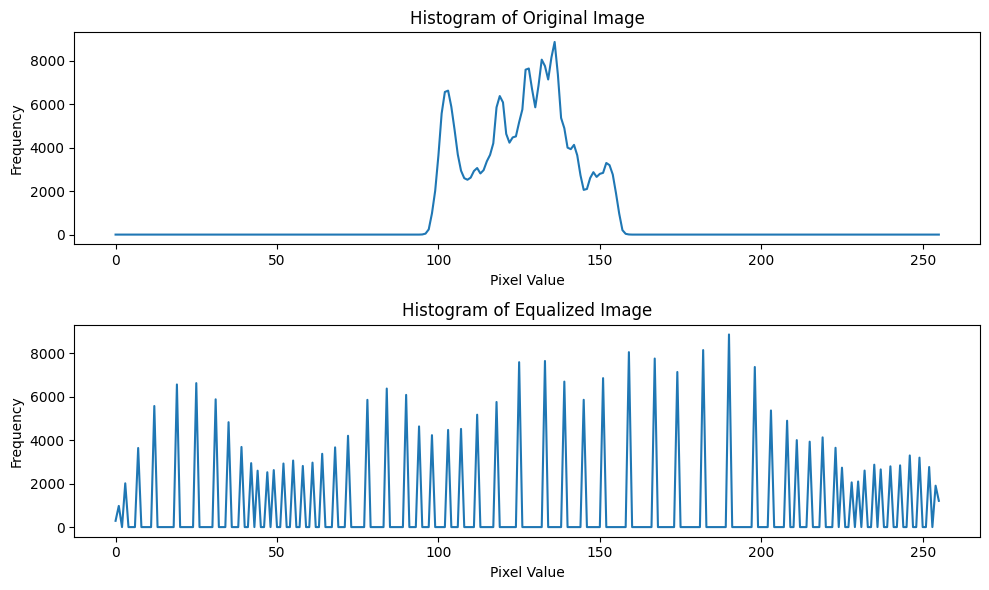

In [28]:
image = cv.imread('/content/drive/MyDrive/Images PCVK/lena_lc.jpg',cv2.IMREAD_GRAYSCALE)
equalized_image = cv.equalizeHist(image)
hist_original = cv.calcHist([image], [0], None, [256], [0, 256])

hist_equalized = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_original)

plt.subplot(2, 1, 2)
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist_equalized)

plt.tight_layout()
plt.show()

Do the mapping process of 16 million RGB colors into just 8 colors, namely black,
green, yellow, blue, cyan, magenta, white as shown in the following output based on
the flowchart below! (Use the image testlena .jpg)

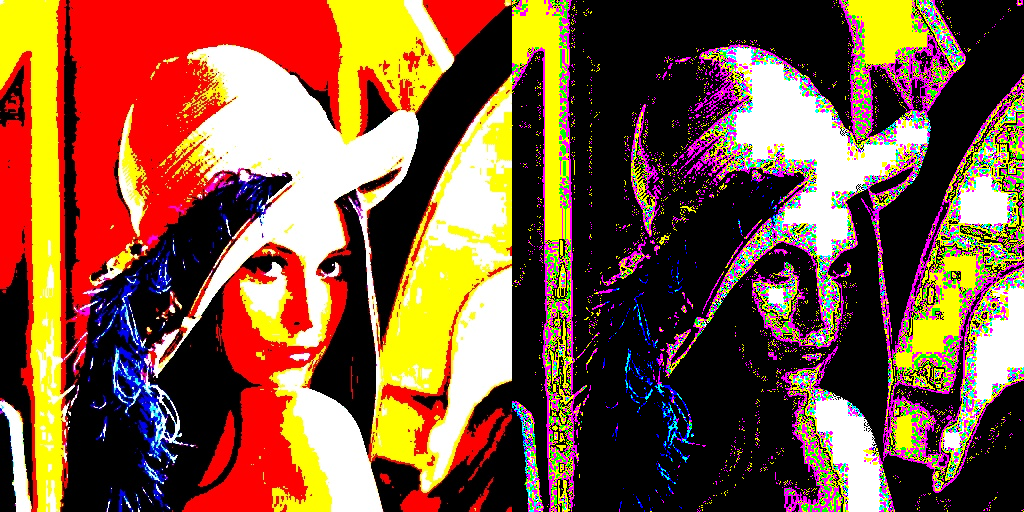

In [29]:
# Load the test image
image = cv.imread('/content/drive/MyDrive/Images PCVK/testlena.jpg')

# Define the 8 target colors (in BGR format)
target_colors = np.array([
    [0, 0, 0],        # Black
    [0, 255, 0],      # Green
    [0, 255, 255],    # Yellow
    [255, 0, 0],      # Blue
    [255, 255, 0],    # Cyan
    [255, 0, 255],    # Magenta
    [255, 255, 255]   # White
], dtype=np.uint8)

# Reshape the image to a 2D array of pixels (rows x columns, 3 color channels)
pixels = image.reshape(-1, 3)

# Calculate the Euclidean distance between each pixel and the target colors
distances = np.linalg.norm(pixels[:, np.newaxis, :] - target_colors, axis=2)

# Find the index of the nearest target color for each pixel
nearest_color_indices = np.argmin(distances, axis=1)

# Map each pixel to its nearest target color
quantized_image = target_colors[nearest_color_indices].reshape(image.shape)

# Display the original and quantized images
final_frame = cv.hconcat((image,quantized_image))
cv2_imshow(final_frame)

Do the Floyd and Steinberg dithering process like the following output (initial image
display, and after dithering display) based on the flowchart below! (Use wiki.jpg
image)

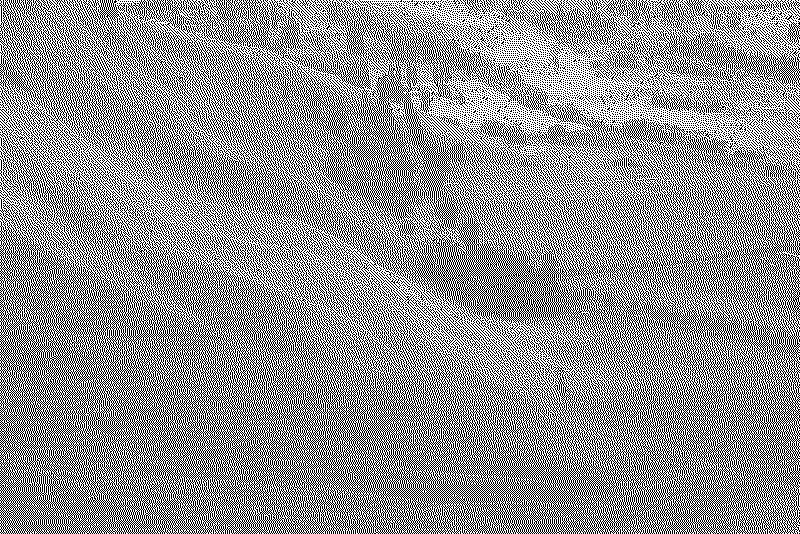

In [49]:

# Load the input image
image = cv2.imread('/content/drive/MyDrive/Images PCVK/wiki.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Get the height and width of the image
height, width = gray_image.shape

# Define the Floyd-Steinberg dithering matrix
dither_matrix = np.array([
    [0, 0, 7],
    [3, 5, 1]
], dtype=np.float32) / 16.0

# Loop through each pixel of the image
for y in range(height):
    for x in range(width):
        # Get the old pixel value (gray intensity)
        old_pixel = gray_image[y, x]

        # Quantize the pixel value based on the Floyd-Steinberg algorithm
        new_pixel = round(old_pixel / 255) * 255

        # Update the pixel value in the image
        gray_image[y, x] = new_pixel

        # Calculate the quantization error
        quant_error = old_pixel - new_pixel

        # Diffusion of the quantization error to neighboring pixels
        for dx in range(-1, 2):
            for dy in range(2):
                if 0 <= x + dx < width and 0 <= y + dy < height:
                    gray_image[y + dy, x + dx] += quant_error * dither_matrix[dy, dx + 1]

cv2_imshow(gray_image)